In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
# for Box-Cox Transformation
from scipy import stats
from pylab import *

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
chocolate = pd.read_csv("chocs.csv")
chocolate.tail(30)

tradetype districtofficecode      districtofficename countryoforigin  \
970   Imports                MSB           Maseru Bridge              LS   
971   Imports                KFN              Kopfontein              BW   
972   Imports                DBN                  Durban              IT   
973   Imports                DBN                  Durban              GB   
974   Imports                JSA  O.R. Tambo Int Airport              US   
975   Imports                CTN               Cape Town              CH   
976   Imports                CTN               Cape Town              DE   
977   Imports                CTN               Cape Town              EG   
978   Imports                DBN                  Durban              CN   
979   Imports                DBN                  Durban              BE   
980   Imports                DBN                  Durban              CH   
981   Imports                DBN                  Durban              IN   
982   Imports                DBN                  Durban              PL   
983   Imports                DBN                  Durban              MY   
984   Imports                DBN                  Durban              SG   
985   Imports                DFM   Cape Town Int Airport              CH   
986   Imports                DFM   Cape Town Int Airport              AE   
987   Imports                DFM   Cape Town Int Airport              BE   
988   Imports                DFM   Cape Town Int Airport              FR   
989   Imports                JHB            Johannesburg              BE   
990   Imports                JSA  O.R. Tambo Int Airport              BE   
991   Imports                JSA  O.R. Tambo Int Airport              GB   
992   Imports                JSA  O.R. Tambo Int Airport              IT   
993   Imports                JSA  O.R. Tambo Int Airport              US   
994   Imports                MSB           Maseru Bridge              LS   
995   Imports                OSH                  Oshoek              SZ   
996   Imports                KFN              Kopfontein              BW   
997   Imports                CTN               Cape Town              BE   
998   Imports                CTN               Cape Town              BR   
999   Imports                DBN                  Durban              BE   

      countryoforiginname countryofdestination countryofdestinationname  \
970               Lesotho                   ZA             South Africa   
971              Botswana                   ZA             South Africa   
972                 Italy                   ZA             South Africa   
973        United Kingdom                   ZA             South Africa   
974         United States                   ZA             South Africa   
975           Switzerland                   ZA             South Africa   
976               Germany                   ZA             South Africa   
977                 Egypt                   ZA             South Africa   
978                 China                   ZA             South Africa   
979               Belgium                   ZA             South Africa   
980           Switzerland                   ZA             South Africa   
981                 India                   ZA             South Africa   
982                Poland                   ZA             South Africa   
983              Malaysia                   ZA             South Africa   
984             Singapore                   ZA             South Africa   
985           Switzerland                   ZA             South Africa   
986  United Arab Emirates                   ZA             South Africa   
987               Belgium                   ZA             South Africa   
988                France                   ZA             South Africa   
989               Belgium                   ZA             South Africa   
990               Belgium                   ZA             South Africa 

## Data Cleaning

Cleaning of data;
Getting the overall picture of our data set, i.e. (null values, redundant columns)


### Null Values

In [3]:
chocolate.isnull().sum()

tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin             11
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

Overall not looking too bad with null values only 11 values in column 'country of origin'

### Duplicated values


In [4]:
chocolate.duplicated().sum()


0

No duplicated values in dataset

### Missing Values

In [5]:
missing_count = chocolate.isna().sum()
missing_count[0:17]

tradetype                    0
districtofficecode           0
districtofficename           0
countryoforigin             11
countryoforiginname          0
countryofdestination         0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

<AxesSubplot:>

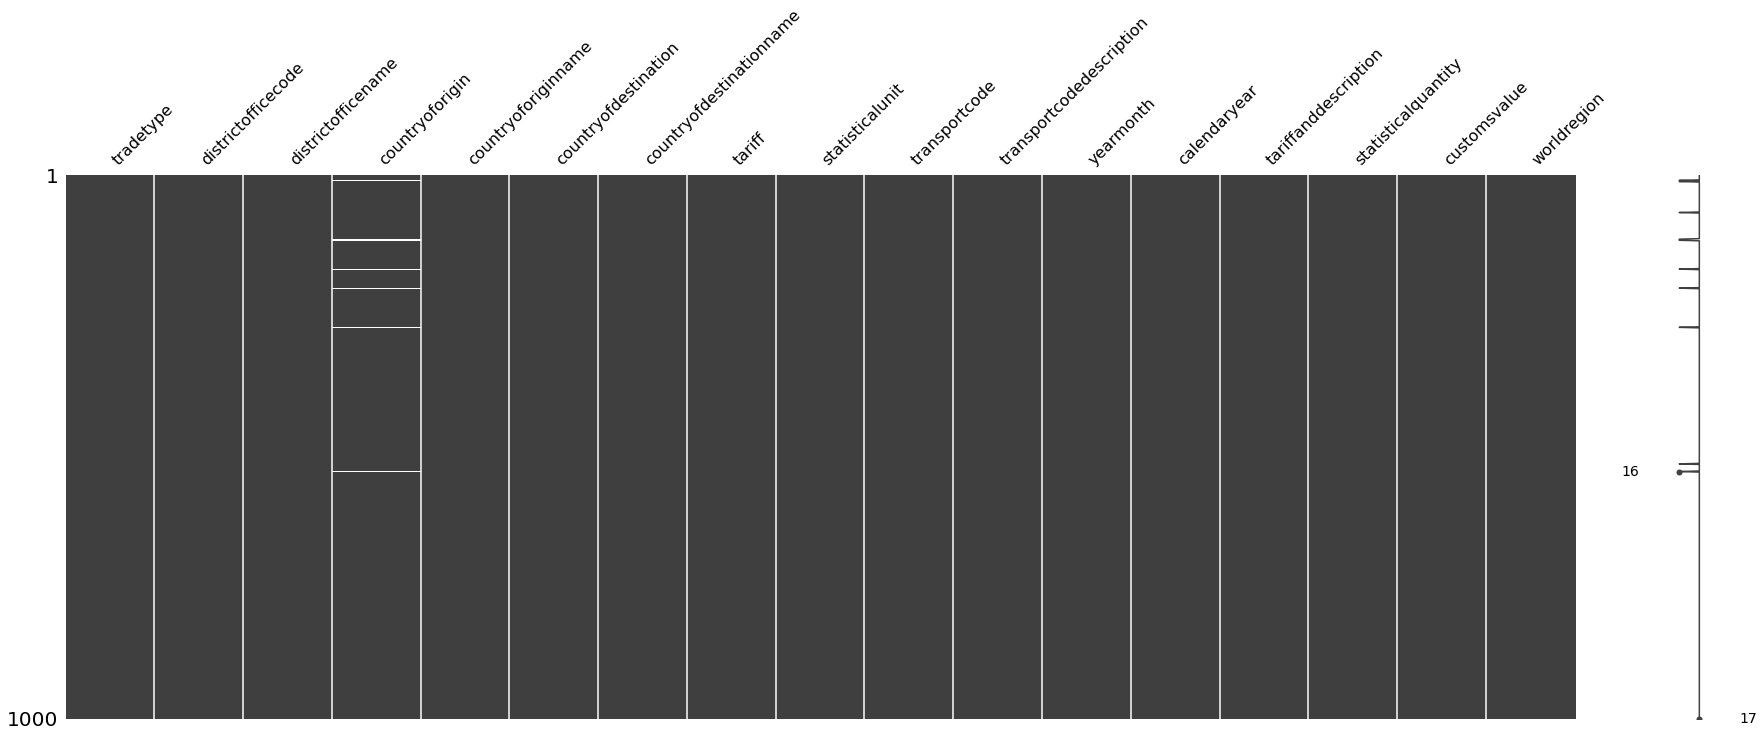

In [6]:
# Graphic visualisation of missing values
missingno.matrix(chocolate, figsize = (30,10))

In [7]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tradetype                 1000 non-null   object 
 1   districtofficecode        1000 non-null   object 
 2   districtofficename        1000 non-null   object 
 3   countryoforigin           989 non-null    object 
 4   countryoforiginname       1000 non-null   object 
 5   countryofdestination      1000 non-null   object 
 6   countryofdestinationname  1000 non-null   object 
 7   tariff                    1000 non-null   int64  
 8   statisticalunit           1000 non-null   object 
 9   transportcode             1000 non-null   int64  
 10  transportcodedescription  1000 non-null   object 
 11  yearmonth                 1000 non-null   int64  
 12  calendaryear              1000 non-null   int64  
 13  tariffanddescription      1000 non-null   object 
 14  statistic

In [8]:
chocolate.columns

Index(['tradetype', 'districtofficecode', 'districtofficename',
       'countryoforigin', 'countryoforiginname', 'countryofdestination',
       'countryofdestinationname', 'tariff', 'statisticalunit',
       'transportcode', 'transportcodedescription', 'yearmonth',
       'calendaryear', 'tariffanddescription', 'statisticalquantity',
       'customsvalue', 'worldregion'],
      dtype='object')

In [4]:
chocolate.drop(["tradetype", " districtofficecode", "countryoforigin", "countryofdestination","tariff","statisticalunit"], axis = 1, inplace= True, errors='ignore')
chocolate.head(30)


districtofficecode      districtofficename countryoforiginname  \
0                 DBN                  Durban             Ireland   
1                 DBN                  Durban             Belgium   
2                 DBN                  Durban             Belgium   
3                 CTN               Cape Town         Switzerland   
4                 CTN               Cape Town              Brazil   
5                 DBN                  Durban         Switzerland   
6                 CTN               Cape Town               Italy   
7                 FBB        Ficksburg Bridge             Lesotho   
8                 JSA  O.R. Tambo Int Airport              France   
9                 KFN              Kopfontein            Botswana   
10                NAR                 Narogas             Namibia   
11                PEZ          Port Elizabeth      United Kingdom   
12                VLD              Vioolsdrif             Namibia   
13                KFN              Kopfontein            Botswana   
14                JSA  O.R. Tambo Int Airport      United Kingdom   
15                JSA  O.R. Tambo Int Airport         Switzerland   
16                CTN               Cape Town              Brazil   
17                FBB        Ficksburg Bridge             Lesotho   
18                DFM   Cape Town Int Airport             Lebanon   
19                CTN               Cape Town         Switzerland   
20                GMR      Germiston/Alberton             Belgium   
21                DBN                  Durban         Netherlands   
22                DBN                  Durban               Kenya   
23                DBN                  Durban           Singapore   
24                DBN                  Durban         Switzerland   
25                DBN                  Durban         Switzerland   
26                CTN               Cape Town             Germany   
27                CTN               Cape Town         Switzerland   
28                DBN                  Durban             Belgium   
29                DBN                  Durban           Singapore   

   countryofdestinationname  transportcode  \
0              South Africa              0   
1              South Africa              0   
2              South Africa              0   
3              South Africa              0   
4              South Africa              0   
5              South Africa              0   
6              South Africa              0   
7              South Africa              3   
8              South Africa              0   
9              South Africa              3   
10             South Africa              3   
11             South Africa              0   
12             South Africa              3   
13             South Africa              3   
14             South Africa              0   
15             South Africa              0   
16             South Africa              0   
17             South Africa              3   
18             South Africa              0   
19             South Africa              0   
20             South Africa              0   
21             South Africa              0   
22             South Africa              0   
23             South Africa              0   
24             South Africa              0   
25             South Africa              0   
26             South Africa              0   
27             South Africa              0   
28             South Africa              0   
29             South Africa              0   

                          transportcodedescription  yearmonth  calendaryear  \
0   Transport mode not specified (Unknown - Other)     201001          2010   
1   Transport mode not specified (Unknown - Other)     201003          2010   
2   Transport mode not specified (Unknown - Other)     201001          2010   
3   Transport mode not specified (Unknown - Other)     201001          2010   
4   Transport mode not specified (Unknown

# Visualisations

Text(0, 0.5, 'Frequency ')

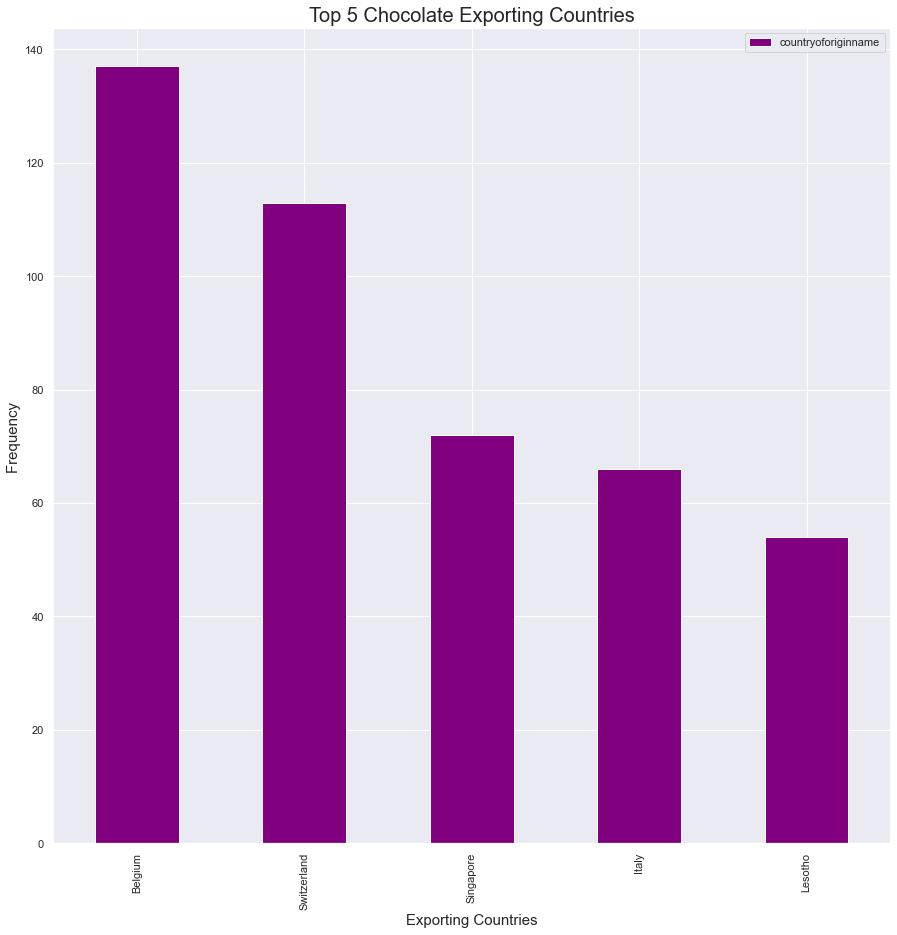

In [73]:
# ranking top 3 importing countries according to customs revenue
chocolate.countryoforiginname.value_counts().nlargest(5).plot(kind='bar',legend='Top 10 Chocolate Importing countries', color='purple', figsize=(15,15))

plt.legend()
plt.title("Top 5 Chocolate Exporting Countries", fontsize=20)
plt.xlabel('Exporting Countries', fontsize=15)
plt.ylabel('Frequency ',fontsize=15)


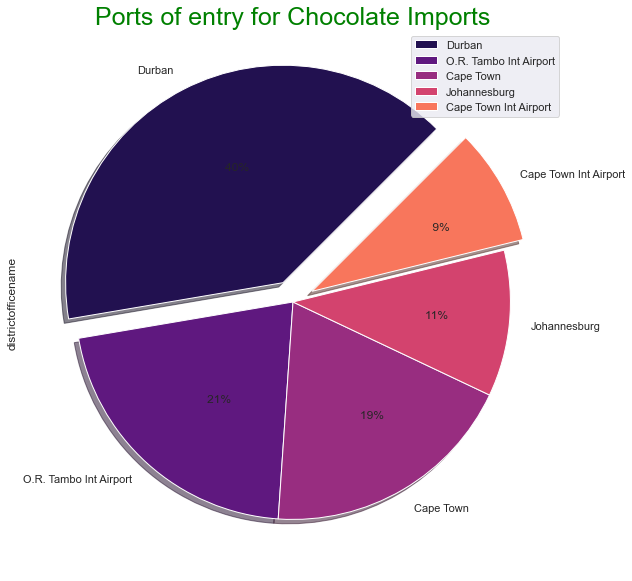

In [70]:
# Ports of entry for imports of chocolate

chocolate.districtofficename.value_counts().nlargest(5).plot(kind='pie',legend='Ports of Entry',explode=[0.1,0,0,0,0.1], shadow=True, startangle=45,autopct='%10.f%%', figsize=(10,10))

plt.title("Ports of entry for Chocolate Imports", fontsize=25, color='green')


plt.show()




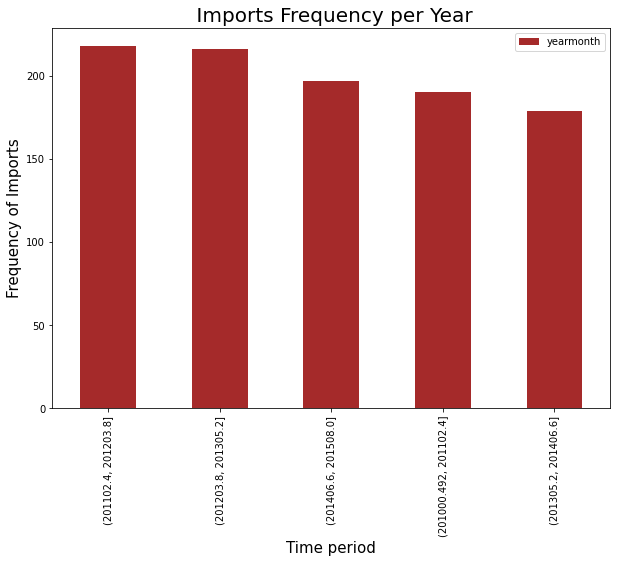

In [45]:
# Imports per Month

chocolate.yearmonth.value_counts(sort=False,bins= 5, ascending=False).nlargest(10).plot(kind='bar',color= 'brown', figsize=(10,7))

plt.title(" Imports Frequency per Year", fontsize=20, color='black')
plt.ylabel('Frequency of Imports', fontsize= 15)
plt.xlabel('Time period', fontsize=15)
plt.legend()
plt.show()

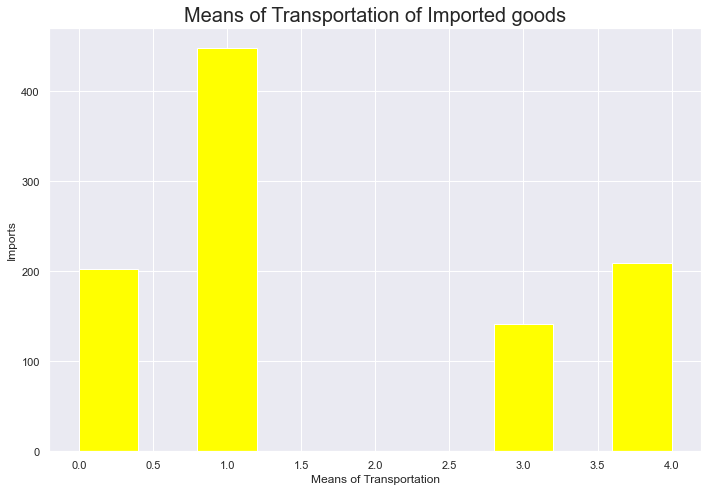

In [126]:
# Port of Entry histogram
chocolate.transportcode[np.abs(chocolate.transportcode-chocolate.transportcode.mean())<=(3*chocolate.transportcode.std())].hist(bins=10,color='yellow',figsize=(10,7));
plt.title("Means of Transportation of Imported goods", fontsize=20)

plt.ylabel('Imports')
plt.xlabel('Means of Transportation');



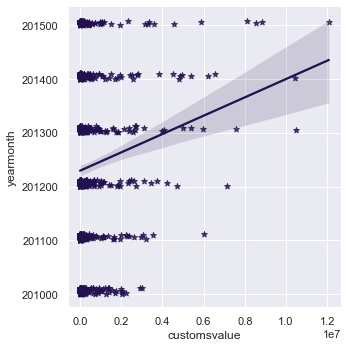

In [66]:
# Regression
sns.set_theme(palette='magma',style='darkgrid',color_codes=True)
sns.lmplot(x="customsvalue", y="yearmonth", markers='*', data=chocolate);

Text(0.5, 1.0, 'Statistical Analysis')

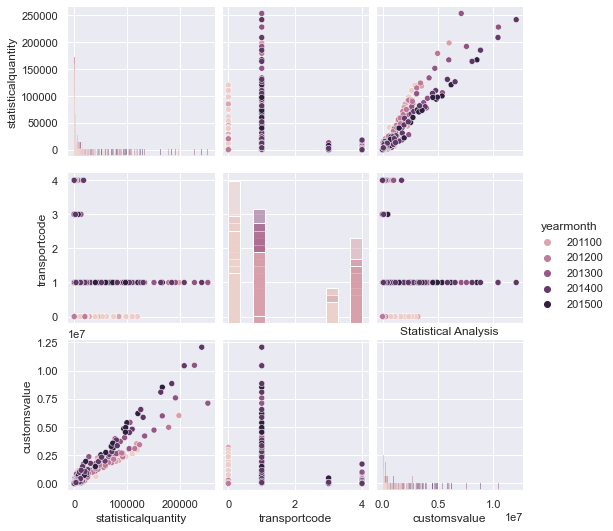

In [132]:
# Statistical visualisations
imports = sns.pairplot(chocolate[["statisticalquantity", "transportcode", "yearmonth", "customsvalue"]], hue="yearmonth", diag_kind="hist")

plt.title('Statistical Analysis')

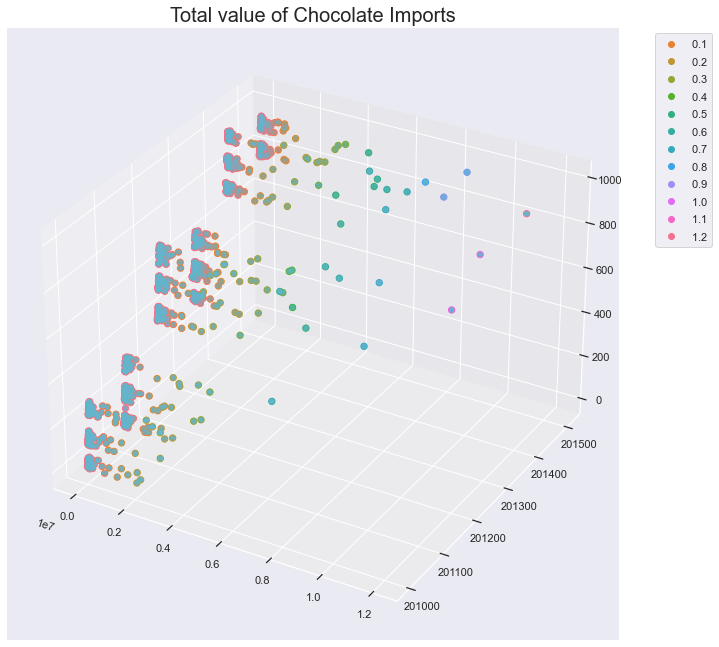

In [123]:
# 3D scatter plot
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

x = chocolate['customsvalue']
y = chocolate['yearmonth']
z = chocolate.index

plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.scatter3D(x, y, z, color = "c")
plt.title("Total value of Chocolate Imports", fontsize=20)

plt.show()




Text(0.5, 1.0, 'Imports classified by World region')

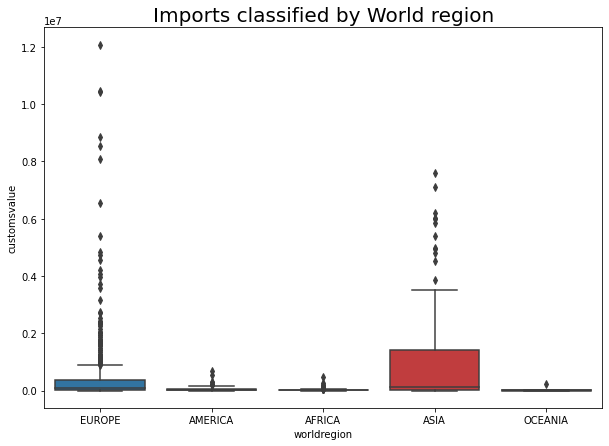

In [26]:
# Value of imports by Region
plt.rcParams['figure.figsize']=(10,7)
ax = sns.boxplot(x="worldregion", y="customsvalue", data=chocolate)
plt.title('Imports classified by World region', fontsize=20, color='black')
    

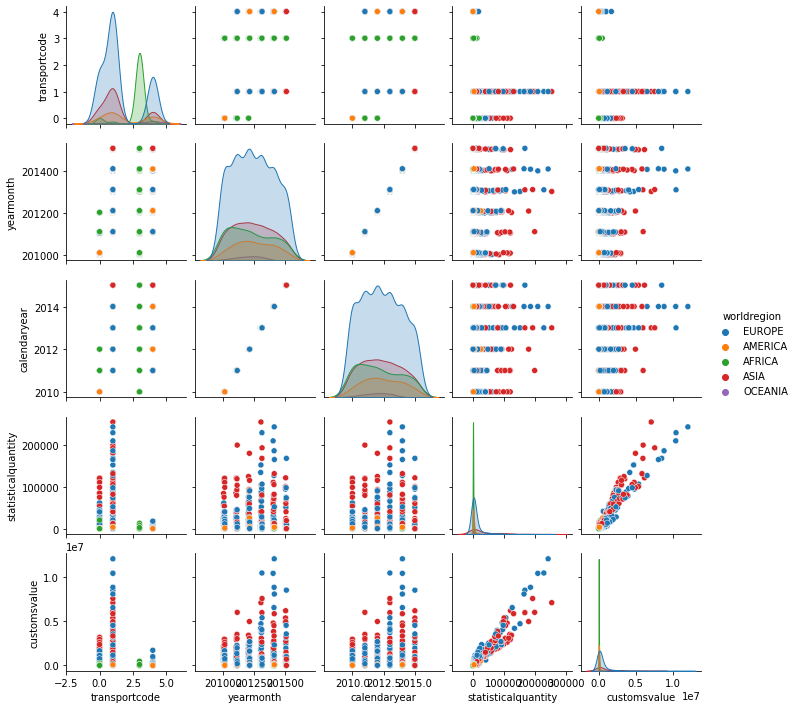

In [22]:
# Correlation Analysis
import seaborn as sns

sns.pairplot(chocolate, hue='worldregion', height=2);

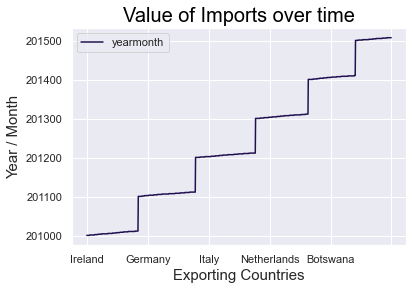

In [64]:
# Stacked area plot    
chocolate.plot(x= 'countryoforiginname', y=['yearmonth'])
plt.title('Value of Imports over time', fontsize=20, color='black')
plt.xlabel('Exporting Countries', fontsize=15)
plt.ylabel('Year / Month', fontsize=15)

plt.show()



In [2]:
# Worldmap
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [48]:
import plotly.express as px

import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(
    data=go.Surface(z=chocolate.values),
    layout=go.Layout(
        title="Chocolate Imports",
        width=500,
        height=500,
    ))

for template in ["plotly_white"]:
    fig.update_layout(template=template, title="Chocolate Imports")
    fig.show()

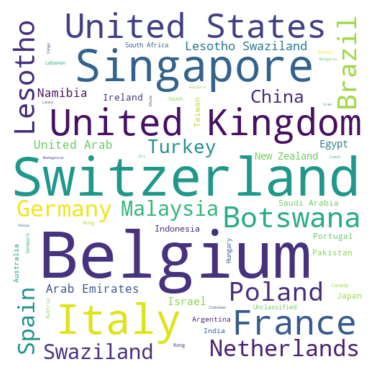

In [3]:
# Importing Countries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(review for review in chocolate.countryoforiginname.astype(str))

wordcloud = WordCloud(background_color="white", width=500, height=500, margin=10).generate(text)
WordCloud().generate(text)

plt.figure(figsize=(5,10))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')


plt.margins(x=0, y=0)

plt.tight_layout(pad=0)


plt.show()

# REFRENCES
1. https://www.tutorialspoint.com/3d-scatterplots-in-python-matplotlib-with-hue-colormap-and-legend
2. https://plotly.com/python/templates/
3. https://onelinerhub.com/python-matplotlib/how-to-plot-3d-heatmap
4. https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
